## simple hand landmark inference

In [31]:
import cv2
import time
import numpy as np

net = cv2.dnn.readNet('hand_landmark.onnx')
outNames = net.getUnconnectedOutLayersNames()
print(outNames)
img = cv2.imread('palm.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
tensor = img / 127.5 - 1.0
blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)


print(blob.shape)
time_start = time.time()
net.setInput(blob)
preds = net.forward(outNames)

print(f"spend time : {time.time() - time_start}")
for pred in preds:
    print(pred.shape)
    print(pred)
    print()

('Identity', 'Identity_1', 'Identity_2')
(1, 3, 224, 224)
spend time : 0.012955427169799805
(1, 63)
[[ 6.15600014e+01  1.79525024e+02 -7.26944208e-03  1.05022980e+02
   1.78844910e+02 -2.35644102e+00  1.37269485e+02  1.64272141e+02
  -7.34674168e+00  1.61872314e+02  1.44259552e+02 -1.17645149e+01
   1.81913605e+02  1.28508774e+02 -1.69434185e+01  1.24611259e+02
   1.18871712e+02 -1.91208534e+01  1.51054260e+02  8.02833862e+01
  -2.37940578e+01  1.66058487e+02  5.74945450e+01 -2.59115543e+01
   1.78017532e+02  3.95996399e+01 -2.76820755e+01  9.89765244e+01
   1.08267319e+02 -1.93883457e+01  1.17420670e+02  6.64731445e+01
  -2.63330879e+01  1.29082321e+02  4.04516258e+01 -2.97618351e+01
   1.39414551e+02  1.91233864e+01 -3.34708290e+01  7.32116852e+01
   1.05783615e+02 -1.83143272e+01  8.50020218e+01  6.65741348e+01
  -2.35014153e+01  9.41094742e+01  4.07012901e+01 -2.62362099e+01
   1.03378761e+02  2.01703453e+01 -2.94752808e+01  4.97371674e+01
   1.09679016e+02 -1.60185814e+01  5.02876

In [70]:
np.set_printoptions(suppress=True)

In [71]:
lms = preds[0].reshape(21, 3) 
print(lms)

[[ 61.56       179.52502     -0.00726944]
 [105.02298    178.84491     -2.356441  ]
 [137.26949    164.27214     -7.3467417 ]
 [161.87231    144.25955    -11.764515  ]
 [181.9136     128.50877    -16.943419  ]
 [124.61126    118.87171    -19.120853  ]
 [151.05426     80.28339    -23.794058  ]
 [166.05849     57.494545   -25.911554  ]
 [178.01753     39.59964    -27.682076  ]
 [ 98.976524   108.26732    -19.388346  ]
 [117.42067     66.473145   -26.333088  ]
 [129.08232     40.451626   -29.761835  ]
 [139.41455     19.123386   -33.47083   ]
 [ 73.211685   105.783615   -18.314327  ]
 [ 85.00202     66.574135   -23.501415  ]
 [ 94.109474    40.70129    -26.23621   ]
 [103.37876     20.170345   -29.47528   ]
 [ 49.737167   109.679016   -16.018581  ]
 [ 50.287643    77.07737    -20.36319   ]
 [ 53.25276     56.08789    -22.637543  ]
 [ 57.79891     37.339035   -25.644184  ]]


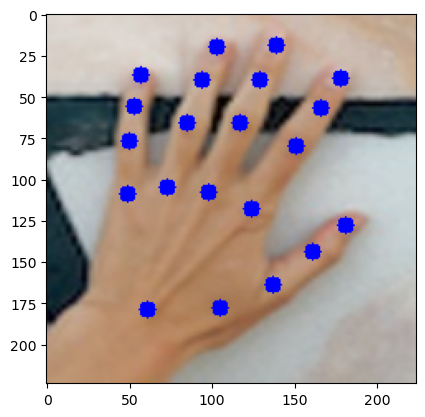

In [81]:
import matplotlib.pyplot as plt

def draw_circle(image, x, y):
    cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1) # 빨간색 원 그리기
tmp = img.copy()

# 이미지에 원 그리기
for point in lms:
    x, y, _ = point
    draw_circle(tmp, x, y)

plt.imshow(tmp)


## 3 hand image inference

[[126.594536   184.06903     -0.01458853]
 [ 80.205376   174.89395     -9.034648  ]
 [ 55.730125   149.79465    -19.764786  ]
 [ 41.44483    118.76322    -26.205418  ]
 [ 25.811901    91.156975   -33.207108  ]
 [ 94.470436   128.31358    -44.924297  ]
 [ 87.821686    67.92357    -46.5832    ]
 [ 82.98898     39.178665   -40.119373  ]
 [ 79.68132     18.872942   -36.40353   ]
 [128.59026    125.65081    -40.2689    ]
 [125.16081     66.77676    -46.61625   ]
 [121.22427     30.824253   -44.086067  ]
 [120.665215     6.3611693  -42.392094  ]
 [156.26622    125.52081    -32.090725  ]
 [160.72752     71.132904   -34.500675  ]
 [162.90497     36.045547   -33.24818   ]
 [165.63605     10.623835   -34.660397  ]
 [174.59492    128.53876    -23.438229  ]
 [186.5403      92.68252    -26.07793   ]
 [193.91853     71.71498    -27.866518  ]
 [198.82635     54.99622    -29.618044  ]]


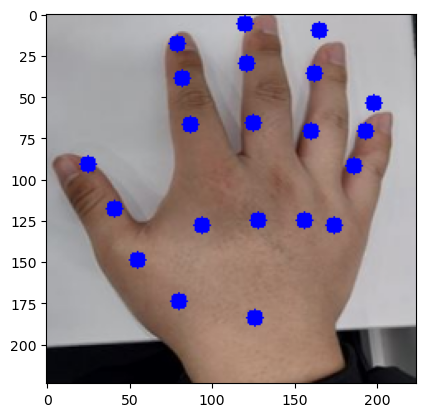

In [83]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

net = cv2.dnn.readNet('hand_landmark.onnx')
outNames = net.getUnconnectedOutLayersNames()

def inference(img_name):
    img = cv2.imread(img_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    tensor = img / 127.5 - 1.0
    blob = cv2.dnn.blobFromImage(tensor.astype(np.float32), swapRB=False, crop=False)
    net.setInput(blob)
    preds = net.forward(outNames)
    lms = preds[0].reshape(21, 3) 
    return img, lms


def draw_circle(image, lms):
    print(lms)
    # 이미지에 원 그리기
    for point in lms:
        x, y, _ = point
        cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1) # 빨간색 원 그리기

img, lms = inference("palm1.JPG")
draw_circle(img, lms)
plt.imshow(img)


[[106.63232    175.0914      -0.01682585]
 [ 66.712685   161.80528    -12.925972  ]
 [ 48.20749    127.84464    -28.026413  ]
 [ 46.88147     96.63188    -37.309315  ]
 [ 48.07438     68.64084    -47.316628  ]
 [ 66.37374    137.00142    -65.596954  ]
 [ 70.78745     76.746796   -79.76615   ]
 [ 73.98591     46.278816   -78.057304  ]
 [ 74.56921     29.640245   -75.23412   ]
 [106.48492    134.32004    -59.65193   ]
 [120.72058     68.86304    -73.646034  ]
 [119.66736     34.84979    -65.36111   ]
 [113.970535    18.498337   -58.36712   ]
 [139.06021    130.41461    -51.477432  ]
 [151.11253     70.233574   -58.469883  ]
 [148.56589     42.50034    -48.271854  ]
 [144.163       31.905378   -41.42714   ]
 [161.12366    127.75564    -43.0485    ]
 [170.12648     82.60645    -45.108055  ]
 [166.34064     63.892776   -38.504105  ]
 [160.23755     59.087624   -33.926136  ]]


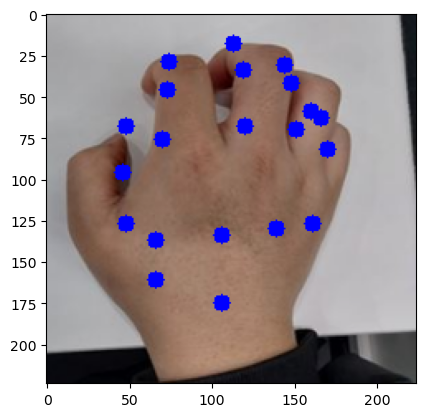

In [84]:
img, lms = inference("palm2.JPG")
draw_circle(img, lms)
plt.imshow(img)


[[108.94206    176.05307     -0.00989121]
 [ 66.63211    156.35696    -13.882428  ]
 [ 43.970314   118.620224   -28.569641  ]
 [ 45.131695    83.90769    -37.969234  ]
 [ 64.411514    63.89466    -47.19398   ]
 [ 78.37755    126.432594   -62.405754  ]
 [ 80.9642      74.20769    -70.32052   ]
 [ 74.78648     55.93254    -63.078762  ]
 [ 69.39938     54.504433   -55.668102  ]
 [116.19742    124.66215    -56.450626  ]
 [113.28812     70.35899    -63.33058   ]
 [101.88953     50.119297   -47.65332   ]
 [ 93.367805    47.89171    -36.144737  ]
 [146.24028    122.291504   -49.578365  ]
 [139.834       70.69418    -51.78156   ]
 [127.0515      50.802727   -37.46406   ]
 [118.22893     50.715637   -28.425808  ]
 [167.25273    120.39207    -43.55783   ]
 [159.85179     78.2602     -44.285862  ]
 [146.55978     62.962257   -35.72725   ]
 [135.62076     66.65822    -30.061409  ]]


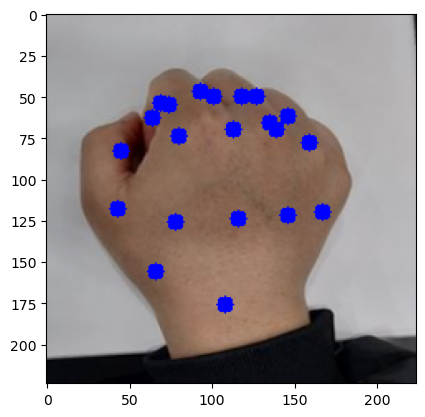

In [85]:
img, lms = inference("palm3.JPG")
draw_circle(img, lms)
plt.imshow(img)
